In [1]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

## Load the consensus dataframe

In [22]:
df = pd.read_csv('../asp_original')

In [23]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [24]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,0,N,N,0.0,0,1,0,N
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,0,N,N,0.0,0,1,0,N
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,0,N,N,0.0,0,0,0,N


# EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null object
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null int64
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch            

In [26]:
# How many columns are in the dataset?
len(df.columns)

64

In [27]:
# Check for duplicate entries
df.duplicated().sum()

77

In [28]:
# look into what these duplicates are:

In [29]:
df[df.duplicated()]

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
221,2019-08-28,1450000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
236,2019-04-05,512500.0,11,6,3,N,N,1,8,98133.0,...,0,0,0,N,N,0.0,0,2,0,N
807,2019-06-18,1198000.0,11,6,3,N,N,1,8,98075.0,...,0,0,0,N,N,0.0,0,0,0,N
815,2019-08-26,975000.0,11,6,3,N,N,1,8,98115.0,...,0,0,0,N,N,0.0,0,0,0,N
960,2019-06-05,1075000.0,11,6,3,N,N,1,8,98033.0,...,0,0,0,N,N,0.0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,2019-09-13,899000.0,11,6,3,N,N,1,8,98092.0,...,0,0,0,N,N,0.0,0,0,0,N
17188,2019-08-14,630000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
17469,2019-07-31,1270000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
17602,2019-03-21,1490000.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N


It's not clear what these duplicates are duplicates of - there's no index so how do we know they're duplicates?  We'll leave them in since they don't appear to be duplicates.

In [30]:
# Check for na's (just look to get an idea; don't drop or impute yet)
df['zipcode'].isna().sum()

2367

So we see that there are 2367 entries with no zipcode.  I don't think we care too much about zipcode just yet so we will leave those values in htere. 

I noticed above that `documentdate` was an object, not datetime object so we change that now:

In [31]:
df['documentdate'] = pd.to_datetime(df['documentdate'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null datetime64[ns]
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null int64
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch    

### Visualise Target Variable:  `saleprice`

## ADD X-AXIS LABEL FOR HIST AND Y LABEL.  USE LESS Y-LABEL TICKS AND MAKE TICK VALUES BIGGER.

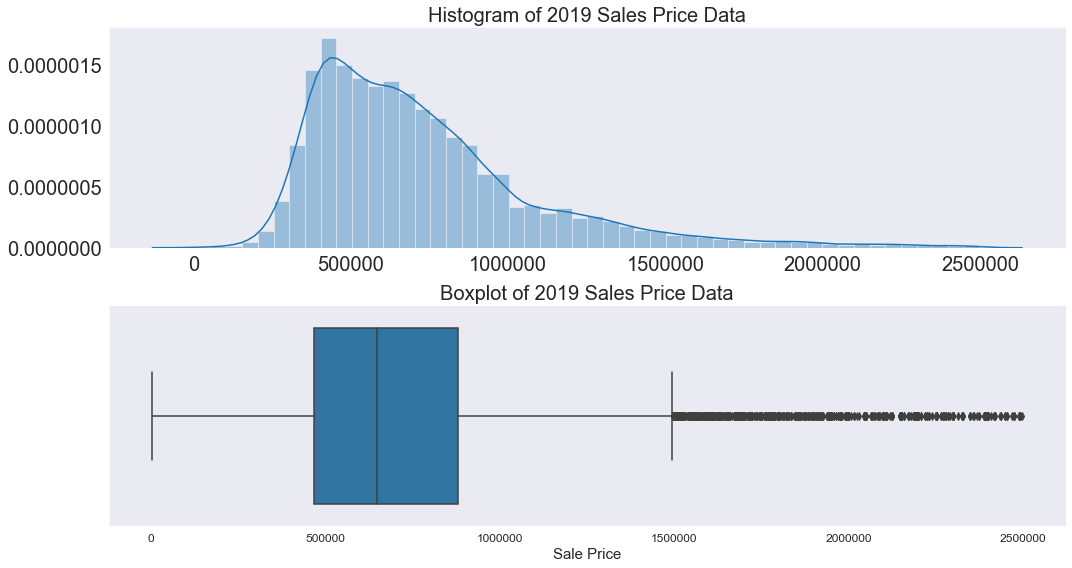

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].set_title('Histogram of 2019 Sales Price Data', fontsize = 20)
sns.distplot(df.saleprice, ax = ax[0], axlabel = "")
ax[1].set_title('Boxplot of 2019 Sales Price Data', fontsize = 20)
sns.boxplot(df.saleprice, ax= ax[1])
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=12)
plt.xlabel('Sale Price', fontsize = 15)
plt.tight_layout()

## Explore Correlations:

Here I'm looking for variables that are highly correlated with the target variable, but not highly correlated with other input variables.

In [35]:
# create a correlation matrix
df.corr()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,zipcode,stories,buildinggrade,squarefeettotalliving,...,waterfrontlocation,waterfrontfootage,waterfrontbank,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,lotdepthfactopr,trafficnoise,airportnoise,powerlines
saleprice,1.000000,-0.009289,NaN,0.019072,-0.019870,-0.033387,-0.035166,0.291290,0.616371,0.596841,...,0.057722,0.078874,0.045279,0.078484,-0.000028,0.030727,0.085101,0.043391,0.005926,NaN
propertytype,-0.009289,1.000000,NaN,0.003744,-0.000966,-0.009551,0.002566,0.061270,-0.003994,-0.042931,...,-0.006389,-0.007703,-0.004999,-0.007456,-0.001932,-0.004049,-0.002845,-0.001795,0.025912,NaN
principaluse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saleinstrument,0.019072,0.003744,NaN,1.000000,-0.258000,-0.003369,-0.000258,0.011049,0.011778,-0.001286,...,0.002820,0.004036,0.002447,0.003768,0.000853,0.001787,0.002523,0.000792,-0.007598,NaN
salereason,-0.019870,-0.000966,NaN,-0.258000,1.000000,0.000869,-0.000312,-0.000972,-0.010860,-0.005156,...,-0.000728,-0.001041,-0.000631,-0.000972,-0.000220,-0.000461,-0.000651,-0.000204,0.034825,NaN
propertyclass,-0.033387,-0.009551,NaN,-0.003369,0.000869,1.000000,-0.001594,-0.033011,0.002954,0.025811,...,-0.002166,0.008226,0.004987,0.007680,0.001739,0.003644,0.005142,0.001615,-0.012777,NaN
zipcode,-0.035166,0.002566,NaN,-0.000258,-0.000312,-0.001594,1.000000,-0.011672,-0.023614,-0.034323,...,-0.000871,-0.000640,0.000167,0.000752,-0.000289,0.000790,0.002324,0.001041,0.008853,NaN
stories,0.291290,0.061270,NaN,0.011049,-0.000972,-0.033011,-0.011672,1.000000,0.447522,0.350447,...,0.004944,-0.008132,-0.008596,-0.010394,-0.016035,-0.009700,-0.006152,0.014088,-0.002612,NaN
buildinggrade,0.616371,-0.003994,NaN,0.011778,-0.010860,0.002954,-0.023614,0.447522,1.000000,0.709274,...,0.047023,0.004425,-0.001804,0.003885,-0.014390,-0.006937,0.003369,0.000432,-0.057989,NaN
squarefeettotalliving,0.596841,-0.042931,NaN,-0.001286,-0.005156,0.025811,-0.034323,0.350447,0.709274,1.000000,...,0.047343,0.021053,0.010696,0.019373,-0.004858,0.008679,0.001530,0.001567,-0.065718,NaN


This is not easy to analyse so we try with a heatmap:

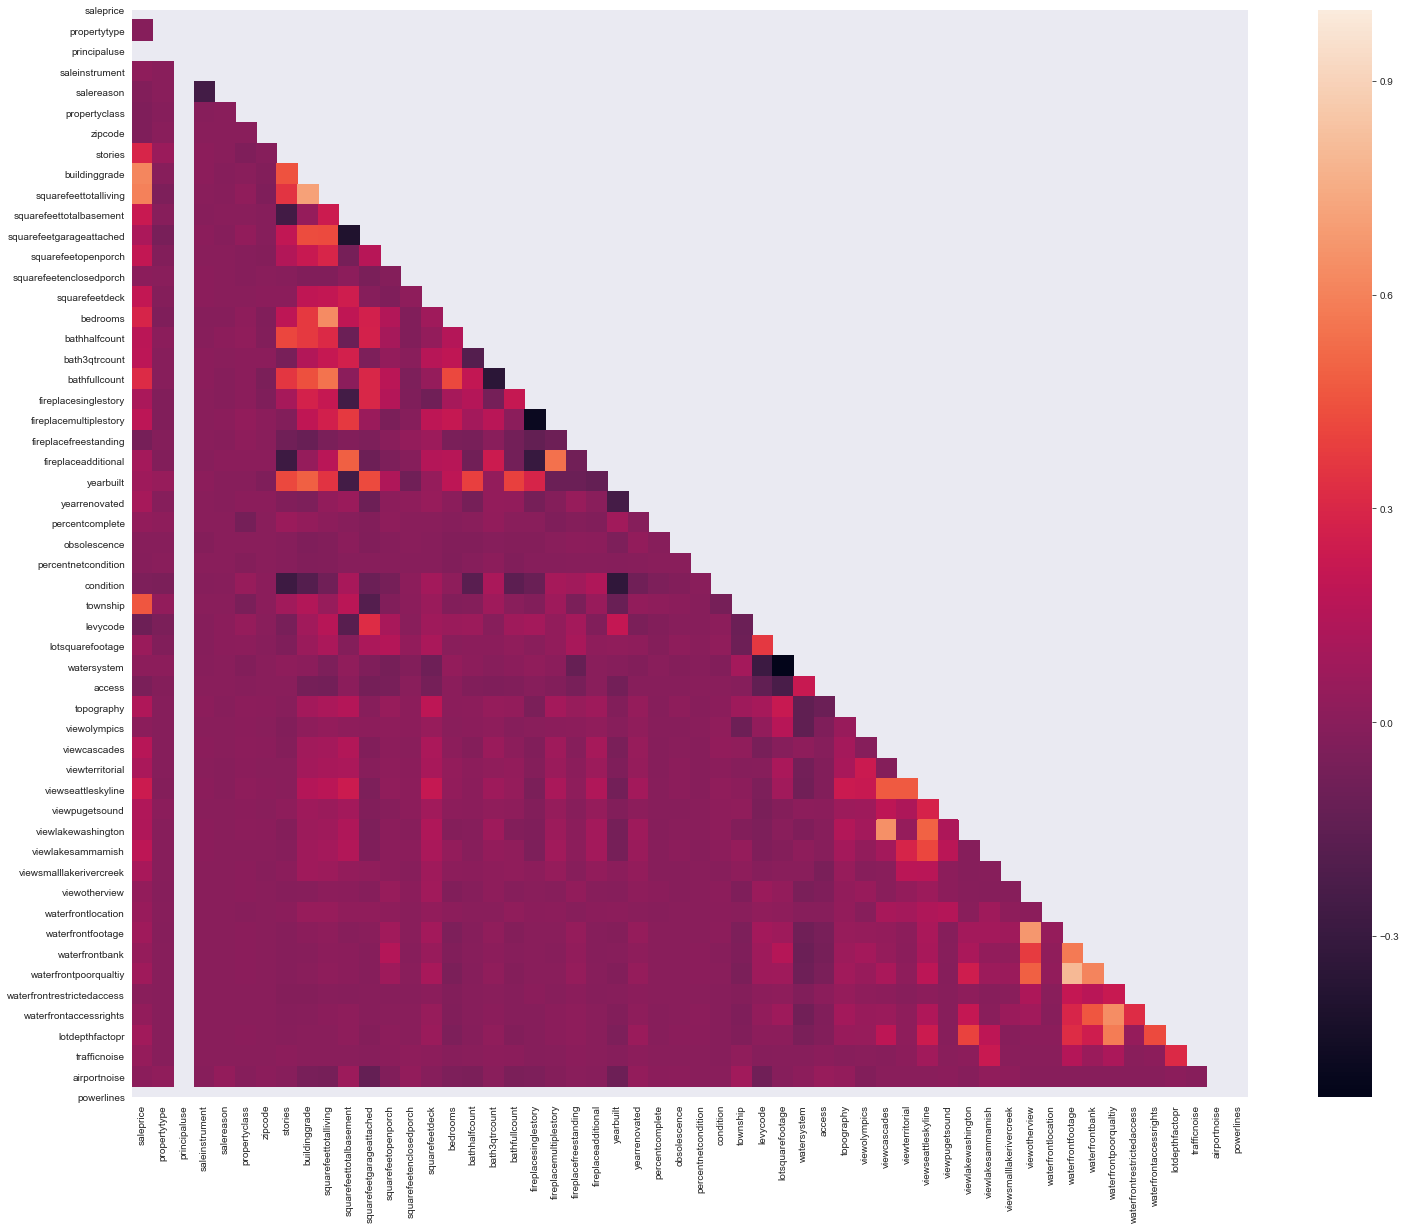

In [33]:
# Then pass the above code into Seaborn's heatmap plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(df.corr(), mask=mask);

Return the features that have a correlation with `saleprice` greater than 0.3:

In [43]:
df_corr = df.corr()

# inspect all the correlations with 'saleprice' in descedning order so we can see highest correlations
sorted_corrs = df_corr['saleprice'].sort_values(ascending = False)
sorted_corrs

saleprice                     1.000000
buildinggrade                 0.616371
squarefeettotalliving         0.596841
township                      0.460482
bathfullcount                 0.314990
stories                       0.291290
bedrooms                      0.285509
viewseattleskyline            0.241013
squarefeettotalbasement       0.225156
squarefeetopenporch           0.206762
squarefeetdeck                0.202800
viewlakesammamish             0.186913
fireplacemultiplestory        0.182270
bath3qtrcount                 0.178428
bathhalfcount                 0.175342
viewcascades                  0.160079
viewpugetsound                0.139496
topography                    0.135018
viewlakewashington            0.133095
squarefeetgarageattached      0.117777
viewterritorial               0.116188
fireplacesinglestory          0.114337
viewsmalllakerivercreek       0.108344
yearrenovated                 0.101951
fireplaceadditional           0.094298
lotdepthfactopr          

In [44]:
high_corrs = sorted_corrs[sorted_corrs > 0.3]
high_corrs

saleprice                1.000000
buildinggrade            0.616371
squarefeettotalliving    0.596841
township                 0.460482
bathfullcount            0.314990
Name: saleprice, dtype: float64

### Inspecting high correlation features:

#### Building Grade:

In [45]:
# checkout building grade unique values and type:
df['buildinggrade'].unique()

array([ 8,  7,  6, 10,  9, 11,  5, 12,  4,  1,  3])

In [48]:
# look up these building codes:
codes = pd.read_csv('../EXTR_LookUp.csv')
codes[codes['LUType'] == 82]

,LUType,LUItem,LUDescription
1150,82,1,1 Cabin ...
1151,82,10,10 Very Good ...
1152,82,11,11 Excellent ...
1153,82,12,12 Luxury ...
1154,82,13,13 Mansion ...
1155,82,2,2 Substandard ...
1156,82,20,Exceptional Properties ...
1157,82,3,3 Poor ...
1158,82,4,4 Low ...
1159,82,5,5 Fair ...


So building grade is a categorical variable.  Let's change it to this type:

In [52]:
# change type:
df['buildinggrade'] = df['buildinggrade'].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null datetime64[ns]
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null category
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch 